In [2]:
pip install scikit-learn

  Using cached scikit_learn-1.5.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (12 kB)
  Using cached scipy-1.14.0-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-macosx_12_0_arm64.whl (11.0 MB)
Using cached scipy-1.14.0-cp312-cp312-macosx_14_0_arm64.whl (23.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV



In [7]:
df=pd.read_csv('data/stud.csv')

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Making Total Score as the dependent feature and dropping math_score,reading_score,writing_score as discussed while executing the eda part of the project.

In [9]:
df['Total score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average Score']=(df['math_score']+df['reading_score']+df['writing_score'])/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
df.drop(columns=['math_score'],axis=1,inplace=True)
df.drop(columns=['reading_score'],axis=1,inplace=True)
df.drop(columns=['writing_score'],axis=1,inplace=True)

In [21]:
df.drop(columns=['Average Score'],axis=1, inplace=True)

In [23]:
X=df.drop(columns=['Total score'],axis=1)
y=df['Total score']

In [24]:
X


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [27]:
y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: Total score, Length: 1000, dtype: int64

In [33]:
print("Categories in 'gender' variable are - ",df['gender'].unique())
print("Categories in 'race_ethinicity' variable are - ",df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' variable are - ",df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable are - ",df['lunch'].unique())
print("Categories in 'test preparation course' variable are - ",df['test_preparation_course'].unique())


Categories in 'gender' variable are -  ['female' 'male']
Categories in 'race_ethinicity' variable are -  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable are -  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable are -  ['standard' 'free/reduced']
Categories in 'test preparation course' variable are -  ['none' 'completed']


In [36]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_tranformer = StandardScaler()
oh_transformer = OneHotEncoder()


In [40]:
preprocessor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer , cat_features),
    ("StandardScaler", numeric_tranformer,num_features)
])

In [42]:
from sklearn.model_selection import train_test_split


In [ ]:
X = preprocessor.fit_transform

In [63]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((800, 17), (200, 17), (800,), (200,))

In [64]:
X.shape

(1000, 17)

In [49]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
pip install 

In [57]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    '''"XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),'''
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 36.5870
- Mean Absolute Error: 29.8084
- R2 Score: 0.2543
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 40.2047
- Mean Absolute Error: 31.4705
- R2 Score: 0.1622


Lasso
Model performance for Training set
- Root Mean Squared Error: 37.3079
- Mean Absolute Error: 30.1134
- R2 Score: 0.2246
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 41.1526
- Mean Absolute Error: 32.2553
- R2 Score: 0.1222


Ridge
Model performance for Training set
- Root Mean Squared Error: 36.5871
- Mean Absolute Error: 29.8066
- R2 Score: 0.2543
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 40.2101
- Mean Absolute Error: 31.4788
- R2 Score: 0.1619


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 35.1022
- Mean Absolute Error: 28.6293
- R2 Score: 0.3136
---------

In [60]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.162172
2,Ridge,0.161946
1,Lasso,0.122201
5,Random Forest Regressor,-0.033494
3,K-Neighbors Regressor,-0.047842
4,Decision Tree,-0.078659


In [65]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 16.22


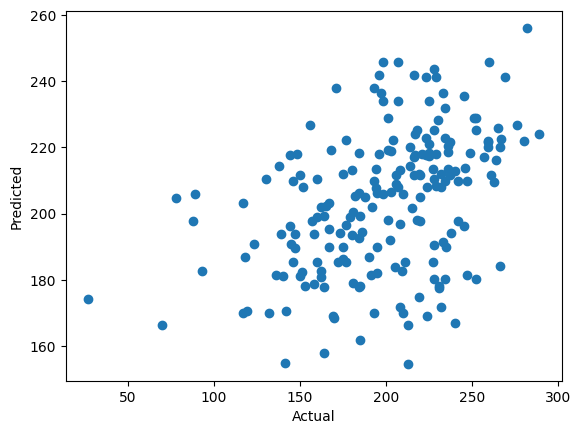

In [62]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

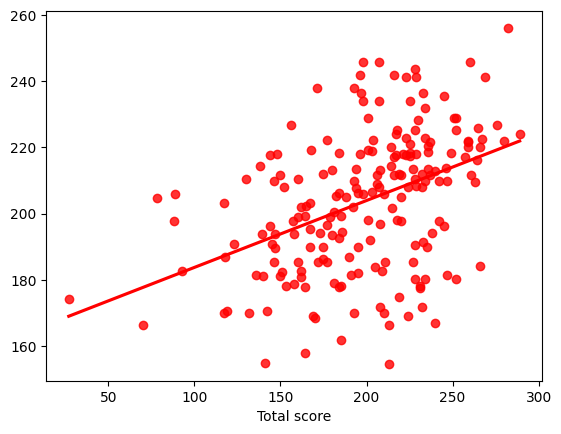

In [66]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [67]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,261,211.568313,49.431687
737,192,201.842859,-9.842859
740,225,218.387815,6.612185
660,224,169.107492,54.892508
411,245,235.490388,9.509612
...,...,...,...
408,165,202.196274,-37.196274
332,171,238.052681,-67.052681
208,231,178.209770,52.790230
613,216,211.568313,4.431687


# Reason for such low accuracy-
I have considered the dependable element as Total Score, instead of Math Score.
To see the accuracy of dependable element as Math Score, as done in the course, refer to model_training_2.ipynb